<a href="https://colab.research.google.com/github/melekbairamova20/melekbairamova20/blob/main/inception_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
def inception_block(inputs, oneXone, txt_red, txt, fxf_red, fxf):
  one_by_one = tf.keras.layers.Conv2D(oneXone, kernel_size = (1, 1),
                                      activation = 'relu',
                                      kernel_initializer = 'he_normal')(inputs)
# red --> reduced
  three_by_three_red = tf.keras.layers.Conv2D(txt_red, kernel_size = (1, 1),
                                              activation = 'relu',
                                              kernel_initializer = 'he_normal',
                                              padding = 'same')(inputs)
  three_by_three = tf.keras.layers.Conv2D(txt, kernel_size = (3, 3),
                                          activation = 'relu',
                                          kernel_initializer = 'he_normal',
                                          padding = 'same')(three_by_three_red)

  five_by_five_red = tf.keras.layers.Conv2D(fxf_red, kernel_size = (1, 1),
                                            activation = 'relu',
                                            kernel_initializer = 'he_normal',
                                            padding = 'same')(inputs)
  five_by_five = tf.keras.layers.Conv2D(fxf, kernel_size = (5, 5),
                                        activation = 'relu',
                                        kernel_initializer = 'he_normal',
                                        padding = 'same')(five_by_five_red)

  max_pool = tf.keras.layers.MaxPooling2D(pool_size = (3, 3),
                                          strides = 1, padding = 'same')(inputs)
  max_pool_1 = tf.keras.layers.Conv2D(oneXone, kernel_size = (1, 1),
                                      activation = 'relu',
                                      kernel_initializer = 'he_normal',
                                      padding = 'same')(max_pool)

  concat = tf.keras.layers.Concatenate()([one_by_one, three_by_three, five_by_five, max_pool_1])
  return concat

In [ ]:
def make_inception_model(shape, n_classes, activation):
  """
  shape is input shape
  n_classes is number of expected outputs
  """

  inputs = tf.keras.layers.Input(shape = (224, 224, 3))
  conv_0 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (7, 7),
                                  strides = 2,
                                  activation = 'relu',
                                  kernel_initializer = 'he_normal',
                                  padding = 'same')(inputs)
  max_pool_0 = tf.keras.layers.MaxPooling2D(pool_size = (3, 3),
                                            strides = 2, padding = 'same')(conv_0)
  batch_norm_0 = tf.keras.layers.BatchNormalization()(max_pool_0)
  conv_1 = tf.keras.layers.Conv2D(filters = 64,
                                  kernel_size = (1, 1),
                                  strides = 1, padding = 'valid',
                                  activation = 'relu',
                                  kernel_initializer = 'he_normal')(batch_norm_0)
  conv_2 = tf.keras.layers.Conv2D(filters = 192,
                                  kernel_size = (3, 3),
                                  strides = 1, padding = 'same',
                                  activation = 'relu',
                                  kernel_initializer = 'he_normal')(conv_1)
  batch_norm_1 = tf.keras.layers.BatchNormalization()(conv_2)
  max_pool_1 = tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = 2,
                                         padding = 'same')(batch_norm_1)

  inception_0 = inception_block(max_pool_1, 64, 96, 128, 16, 32)
  inception_1 = inception_block(inception_0, 128, 128, 192, 32, 96)
  max_pool_2 = tf.keras.layers.MaxPool2D(pool_size = (3, 3),
                                         strides = 2, padding = 'same')(inception_1)

  inception_2 = inception_block(max_pool_2, 192, 96, 208, 16, 48)

  # output_0
  avg_pool_0 = tf.keras.layers.AveragePooling2D(pool_size = (5, 5),
                                                strides = 3,
                                                padding = 'valid')(inception_2)
  conv_out_0 = tf.keras.layers.Conv2D(filters = 192,
                                      kernel_size = (1, 1),
                                      padding = 'same',
                                      strides = 1,
                                      kernel_initializer = 'he_normal',
                                      activation = 'relu')(avg_pool_0)
  flattened_0 = tf.keras.layers.Flatten()(conv_out_0)
  dense_0 = tf.keras.layers.Dense(64, activation = 'relu',
                                  kernel_initializer = 'he_normal')(flattened_0)

  output_0 = tf.keras.layers.Dense(n_classes, activation = activation)(dense_0)

  # output_0 end
  inception_3 = inception_block(inception_2, 160, 112, 224, 24, 64)
  inception_4 = inception_block(inception_3, 128, 128, 256, 24, 64)
  inception_5 = inception_block(inception_4, 112, 144, 288, 32, 64)

  # output_1
  avg_pool_1 = tf.keras.layers.AveragePooling2D(pool_size = (5, 5),
                                                strides = 3,
                                                padding = 'valid')(inception_5)
  conv_out_1 = tf.keras.layers.Conv2D(filters = 192, kernel_size = (1, 1),
                                      padding = 'same', strides = 1,
                                      kernel_initializer = 'he_normal',
                                      activation = 'relu')(avg_pool_1)
  flattened_1 = tf.keras.layers.Flatten()(conv_out_1)
  dense_1 = tf.keras.layers.Dense(64, activation = 'relu',
                                  kernel_initializer = 'he_normal')(flattened_1)
  output_1 = tf.keras.layers.Dense(n_classes, activation = activation)(dense_1)

  # output_1 end
  inception_6 = inception_block(inception_5, 256, 160, 320, 32, 128)
  max_pool_3 = tf.keras.layers.MaxPooling2D(pool_size = (3, 3), strides = 2, padding = 'same')(inception_6)

  inception_7 = inception_block(max_pool_3, 256, 160, 320, 32, 128)
  inception_8 = inception_block(inception_7, 384, 192, 384, 48, 128)

  avg_pool_2 = tf.keras.layers.AveragePooling2D(pool_size = (7, 7), strides = 1, padding = 'valid')(inception_8)

  flattened_2 = tf.keras.layers.Flatten()(avg_pool_2)
  output_2 = tf.keras.layers.Dense(n_classes, activation= activation)(flattened_2)

  inception_model = tf.keras.Model(inputs = inputs, outputs = [output_0, output_1, output_2])
  return inception_model


In [ ]:
inception_model = make_inception_model(224, 1, 'sigmoid')

In [ ]:
inception_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_84 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_27          │ (None, 56, 56, 64)     │              0 │ conv2d_84[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 56, 56, 64)     │            256 │ max_pooling2d_27[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_85 (Conv2D)        │ (None, 56, 56, 64)     │          4,160 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_86 (Conv2D)        │ (None, 56, 56, 192)    │        110,784 │ conv2d_85[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 56, 56, 192)    │            768 │ conv2d_86[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_28          │ (None, 28, 28, 192)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_88 (Conv2D)        │ (None, 28, 28, 96)     │         18,528 │ max_pooling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_90 (Conv2D)        │ (None, 28, 28, 16)     │          3,088 │ max_pooling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_29          │ (None, 28, 28, 192)    │              0 │ max_pooling2d_28[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_87 (Conv2D)        │ (None, 28, 28, 64)     │         12,352 │ max_pooling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_89 (Conv2D)        │ (None, 28, 28, 128)    │        110,720 │ conv2d_88[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_91 (Conv2D)        │ (None, 28, 28, 32)     │         12,832 │ conv2d_90[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_92 (Conv2D)        │ (None, 28, 28, 64)     │         12,352 │ max_pooling2d_29[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 28, 28, 288)    │              0 │ conv2d_87[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_89[0][0],       │
│                      

 Total params: 7,602,787 (29.00 MB)

 Trainable params: 7,602,275 (29.00 MB)

 Non-trainable params: 512 (2.00 KB)

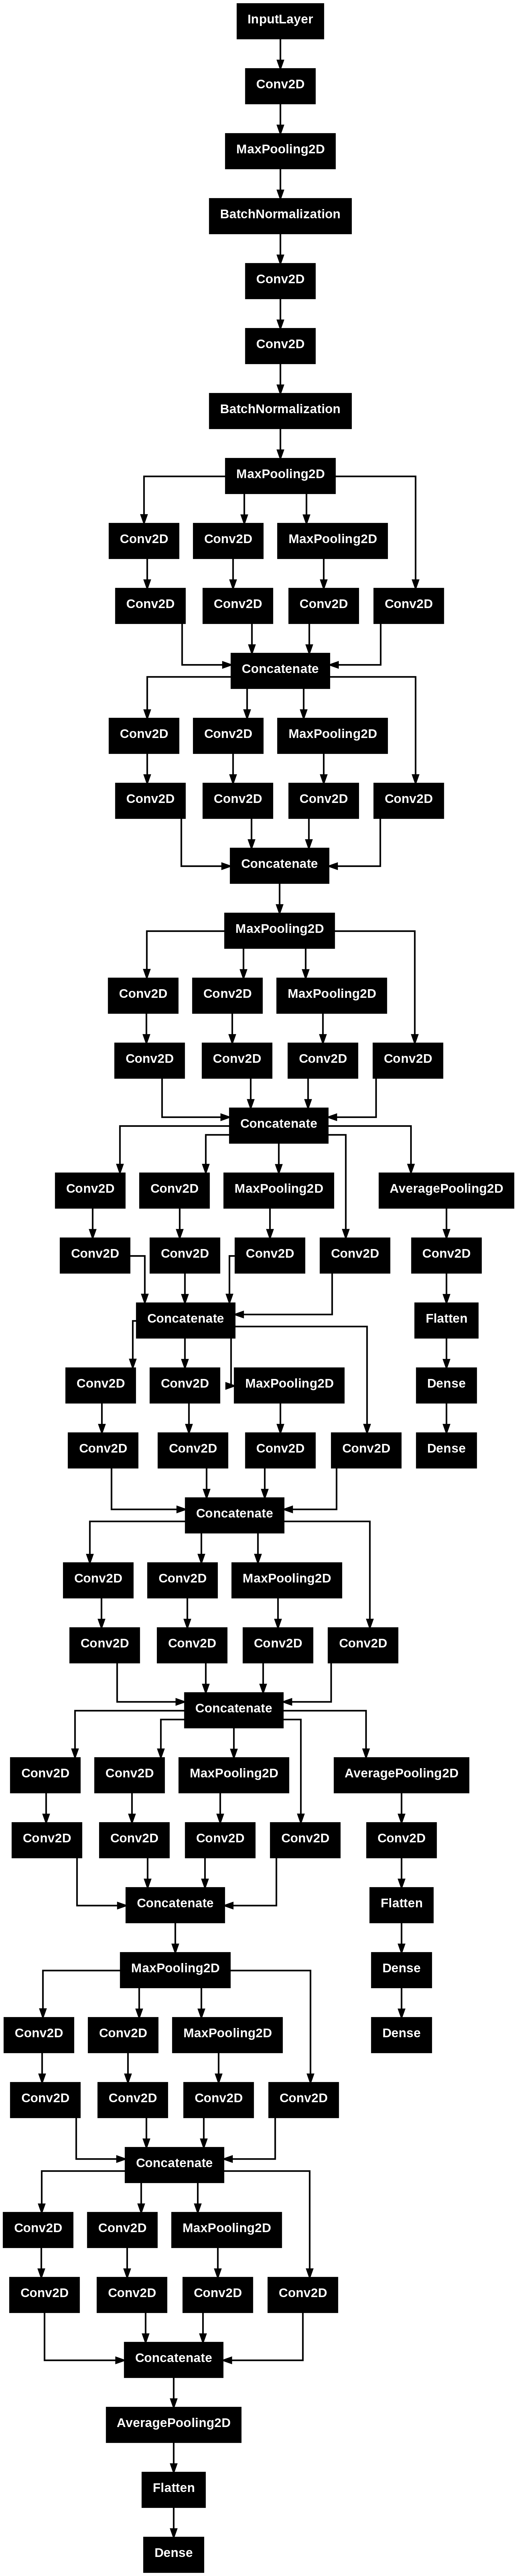

In [ ]:
.tf.keras.utils.plot_model(inception_model)